In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('drive/My Drive/Covid_Detection/metadata.csv')
print(type(df))
for index,row in df.iterrows():
  print(row)

In [ ]:

import pandas as pd
import random
import csv


covid_chestxray='drive/My Drive/Covid_Detection/metadata.csv'
kaggle_normal = 'drive/My Drive/Covid_Detection/stage_2_detailed_class_info.csv' # normal cases from kaggle dataset
kaggle_pneumonia = 'drive/My Drive/Covid_Detection/stage_2_train_labels.csv' # pneumonia cases from kaggle dataset


related_views=["AP","PA","AP Supine","AP semi erect"]  #The view column in the covid_chestxray dataset that has suitable data
filename_label = {'normal': [], 'pneumonia': [], 'COVID-19': []}

mapping = dict() #mapping the types of the suitable data in the covid-chestxray-dataset into 3 classes
mapping['COVID-19'] = 'COVID-19'
mapping['COVID-19, ARDS'] = 'COVID-19'
mapping['Pneumocystis'] = 'pneumonia'
mapping['SARS'] = 'pneumonia'
mapping['Streptococcus'] = 'pneumonia'
mapping['Normal'] = 'normal'

covid_csv = pd.read_csv(covid_chestxray)
for index, row in covid_csv.iterrows():
    if row['finding'] in mapping:
        if row['view'] in related_views:
            if row['filename'] not in filename_label[mapping[row['finding']]]:
                print(row['filename'])
                filename_label[mapping[row['finding']]].append(
                    row['filename'])  # add the suitable images names in the covid-chestxray-dataset

csv_normal = pd.read_csv(kaggle_normal)
csv_pneu = pd.read_csv(kaggle_pneumonia)
all_names = []
for index, row in csv_normal.iterrows():
    if row['class'] == 'Normal':
        if row['patientId'] not in all_names:
            all_names.append(row['patientId'])
            new_name = row['patientId'] + '.dcm'
            if new_name not in filename_label['normal']:
                filename_label['normal'].append(new_name)  # add the suitable normal cases names in the kaggle dataset

for index, row in csv_pneu.iterrows():
    if int(row['Target']) == 1:
        if row['patientId'] not in all_names:
            all_names.append(row['patientId'])
            new_name = row['patientId'] + '.dcm'
            if new_name not in filename_label['pneumonia']:
                filename_label['pneumonia'].append(
                    new_name)  # add the suitable pneumonia cases names in the kaggle dataset

with open('All.csv', newline='', mode='w') as csvfile:
    csv_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(['filename', 'class'])
    for key in filename_label:
        for row in filename_label[key]:
            if '.dcm' in row:
                new_row = row[:-4] + '.png'
                csv_writer.writerow([new_row, key])
            else:
                 csv_writer.writerow([row, key])

related_views=["AP","PA","AP Supine","AP semi erect"]
filename_label = {'normal': [], 'pneumonia': [], 'COVID-19': []}
covid_csv = pd.read_csv(covid_chestxray)
for index, row in covid_csv.iterrows():
        if row['finding'] in mapping:
            if row['view'] in related_views:
                if row['filename'] not in filename_label[mapping[row['finding']]]:
                    filename_label[mapping[row['finding']]].append(row['filename'])


common_test_id=['19', '20', '36', '42', '86','13','96','51','49','116','150','151','168','56','70','16','17','18','21','33','34','36','37','44','45','46','47','165','166','164','161','160','132','162','159','158','39','40','41','43','44','45','46','47','48','50','51','52','157','156','155','154','153','151','149','148','147','146','145','71','72','73','74','53','56','57','58','59','60','61','62','63','64','65','66','67','68','69','118','132','139','138','141','144','8', '31','171']
print(len(common_test_id))
common_train={'normal':[],'COVID-19': [],'pneumonia':[]}
common_test=[]
covid_csv = pd.read_csv(covid_chestxray)
for index,row in covid_csv.iterrows():
    if str(row['patientid']) in common_test_id:
        if row['view'] in related_views:
         if(row['filename']) not in common_test:
            common_test.append(row['filename'])


for i in filename_label['COVID-19']:
    if i not in common_test:
        common_train['COVID-19'].append(i)

for i in filename_label['pneumonia']:
    if i not in common_test:
        common_train['pneumonia'].append(i)

print(len(common_train['COVID-19']))
print(len(common_train['pneumonia']))
csv_normal = pd.read_csv(kaggle_normal)

all_names = []
for index, row in csv_normal.iterrows(): #add the suitable normal cases in the kaggle dataset
        if row['class'] == 'Normal':
            if row['patientId'] not in all_names:
                all_names.append(row['patientId'])
                new_name=row['patientId']+'.dcm'
                if new_name not in filename_label['normal']:
                    filename_label['normal'].append(new_name)


for index, row in csv_pneu.iterrows(): #add the suitable pneumonia cases in the kaggle dataset
        if int(row['Target']) == 1:
            if row['patientId'] not in all_names:
                all_names.append(row['patientId'])
                new_name=row['patientId']+'.dcm'
                if new_name not in filename_label['pneumonia']:
                    filename_label['pneumonia'].append(new_name)

temp_all_train={'normal': [], 'pneumonia': [], 'COVID-19': []}
for key in filename_label:
        for fl in filename_label[key]:
            if fl not in common_test:
                if fl not in common_train[key]:
                  temp_all_train[key].append(fl)

for i in range(10):
        for key in temp_all_train:
            random.shuffle(temp_all_train[key])


for i in range(1,9):
    globals()['train{}'.format(i)]={'normal': [], 'pneumonia': common_train['pneumonia'].copy(),
                          'COVID-19': common_train['COVID-19'].copy()}
    globals()['train{}'.format(i)]['normal'].extend(temp_all_train['normal'][250 * i:(250 * i) + 250])
    globals()['train{}'.format(i)]['pneumonia'].extend(temp_all_train['pneumonia'][200 * i:(200 * i) + 200])

for i in range(1,9): #Export CSV
        with open('drive/My Drive/Covid_Detection/Train_Division_csv/train{}.csv'.format(i),newline='', mode='w') as csvfile:
             all_rows=[]
             csv_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
             csv_writer.writerow(['filename','class'])
             for key in globals()['train{}'.format(i)]:
                 for row in globals()['train{}'.format(i)][key]:
                     if '.dcm' in row:
                         new_row=row[:-4]+'.png'
                         all_rows.append([new_row,key])
                     else:
                         if '.png ' in row:
                             all_rows.append([row[:-1],key])
                         else:
                            all_rows.append([row,key])
             for j in range(10):
                random.shuffle(all_rows)
             for arow in all_rows:
                csv_writer.writerow(arow)

auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
nejmc2001573_f1a.jpeg
nejmc2001573_f1b.jpeg
lancet-case2a.jpg
lancet-case2b.jpg
SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg
SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg
SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg
SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg
SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day5.jpeg
SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day12.jpeg
SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg
SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day27.jpeg
1-s2.0-S0140673620303706-fx1_lrg.jpg
nCoV-radiol.20202

In [ ]:
!pip install -q pydicom
!pip3 install -q tqdm 
!pip3 install -q imgaug
!pip3 install -q kaggle
!pip3 install -q pypng
!pip3 install -q pillow
!pip3 install PyDrive

     |████████████████████████████████| 1.9MB 9.3MB/s 
     |████████████████████████████████| 655kB 8.4MB/s 


In [ ]:
import os

import pydicom as dicom
import pandas as pd
import cv2
import keras
import keras_preprocessing

csv_all=pd.read_csv("All.csv")
for index, row in csv_all.iterrows():
     if '.png' in row['filename']:
              try:
                png_index = row['filename'].find('.png') 
                last_name = row['filename'][:png_index] + '.dcm'
                print(last_name)
                ds = dicom.dcmread(os.path.join('drive/My Drive/Covid_Detection/stage_2_train_images', last_name))
                print('hello')
                pixel_array_numpy = ds.pixel_array
                print(pixel_array_numpy.shape)
                imgname = last_name[:-4] + '.png'
                cv2.imwrite(os.path.join('drive/My Drive/Covid_Detection/All', imgname), pixel_array_numpy)
              except:
                    img = cv2.imread(os.path.join('drive/My Drive/Covid_Detection/covid-chestxray-dataset-master/images', row['filename']))
                    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    print(gray)
                    cv2.imwrite(os.path.join('All', row['filename'][:png_index + 4]), gray)
     else:
      img = cv2.imread(os.path.join('drive/My Drive/Covid_Detection/covid-chestxray-dataset-master/images', row['filename']))
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      print(gray)
      cv2.imwrite(os.path.join('drive/My Drive/Covid_Detection/All', row['filename']), gray)


Streaming output truncated to the last 5000 lines.
(1024, 1024)
f5ff6567-9b99-4070-9b62-51b336336859.dcm
hello
(1024, 1024)
f6077569-6aa3-4132-856b-6bdcbdd70cd6.dcm
hello
(1024, 1024)
f61c2271-a0f0-4a88-a803-71bd7dba0be9.dcm
hello
(1024, 1024)
f630809e-2498-44af-beaa-dda23a36cf20.dcm
hello
(1024, 1024)
f638a33c-ee3e-4179-a095-4fec05ab51e5.dcm
hello
(1024, 1024)
f650ee02-3a03-4da0-8fd9-12f1ffae35b4.dcm
hello
(1024, 1024)
f652df75-c199-44a9-870b-54f68aae814d.dcm
hello
(1024, 1024)
f655a822-225d-4fe0-a69f-0886f91c5f2b.dcm
hello
(1024, 1024)
f65e81f1-e1b5-43d0-8815-f9004343ac56.dcm
hello
(1024, 1024)
f661fe70-2fc1-4564-9f53-45504c0b0688.dcm
hello
(1024, 1024)
f66549b1-f756-45d1-88cd-f0083e9a25ca.dcm
hello
(1024, 1024)
f6669e27-825f-4fb9-b86a-ba61b9538342.dcm
hello
(1024, 1024)
f676d04c-a1cb-4714-a17b-e3bf1ec329d7.dcm
hello
(1024, 1024)
f67d2434-0c18-441e-9ed4-66af65f511f7.dcm
hello
(1024, 1024)
f696261f-49c1-4274-81be-4e6b9e8c5602.dcm
hello
(1024, 1024)
f6b16a6d-345a-4348-93ba-48c69ac76822

In [ ]:
import pandas as pd
import csv
import keras
import keras_preprocessing
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras_preprocessing.image import ImageDataGenerator

import cv2
All=[]
train=[]
validation=[]
test=[]

ALl_csv = pd.read_csv('drive/My Drive/Covid_Detection/All.csv')
for index, row in ALl_csv.iterrows():
    All.append(row.values.tolist())

for i in range(1,9):
   train_csv= pd.read_csv('drive/My Drive/Covid_Detection/Train_Division_csv/train{}.csv'.format(i))
   for index,row in train_csv.iterrows():
       train.append(row.values.tolist())
with open('drive/My Drive/Covid_Detection/all_test.csv',newline='', mode='w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csvwriter.writerow(['filename','class'])
    for row in All:
      if row not in train:
        csvwriter.writerow(row)
with open('drive/My Drive/Covid_Detection/s_test.csv'.format(i), newline='',
    mode='w') as csvfile:  
    csvwriter = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csvwriter.writerow(['filename', 'class'])
    ln = 0
    lp = 0
    for row in All:
        if row not in train:
             if row[1] == 'COVID-19':
                     csvwriter.writerow(row)
             elif row[1] == 'normal':
                 if ln < 300:
                      csvwriter.writerow(row)
                      ln += 1
             else:
                 if lp < 300:
                      csvwriter.writerow(row)
                      lp += 1
print("completed")

completed


In [ ]:
import cv2
import keras
import keras_preprocessing
import pandas as pd
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras_preprocessing.image import ImageDataGenerator
from tensorflow import metrics
from keras.callbacks import ModelCheckpoint


train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rescale=1./255,zoom_range=0.05,rotation_range=360,width_shift_range=0.05,height_shift_range=0.05,shear_range=0.05)
test_datagen = ImageDataGenerator(rescale=1./255)
test_df = pd.read_csv("drive/My Drive/Covid_Detection/s_test.csv")
print(type(train_datagen))


for epoch_num in range(1,9):
  train_df =pd.read_csv("drive/My Drive/Covid_Detection/Train_Division_csv/train{}.csv".format(epoch_num)) 
  train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory='drive/My Drive/Covid_Detection/All',
        x_col="filename",
        y_col="class",
        target_size=(300, 300),
        batch_size=20,
        class_mode='categorical',shuffle=True)
  validation_generator = test_datagen.flow_from_dataframe(
          dataframe=test_df,
          directory='drive/My Drive/Covid_Detection/All',
          x_col="filename",
          y_col="class",
          target_size=(300, 300),
          batch_size=20,
          class_mode='categorical',shuffle=True)
  full_name='concatenate'
  filepath="drive/My Drive/Covid_Detection/Models/%s-{epoch:02d}-{val_accuracy:.4f}.hdf5"%full_name 
  checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max')
  callbacks_list = [checkpoint]
  model = keras.Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(300,300,3)))
  model.add(Conv2D(128, (3, 3), activation='relu'))   
  model.add(MaxPooling2D((2,2)))         
  model.add(Conv2D(64, (3, 3), activation='relu'))   
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, input_shape=(300,300,3), activation='relu'))
  model.add(Dense(3, activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit_generator(train_generator, epochs=100,validation_data=validation_generator,shuffle=True,callbacks=callbacks_list)
  

<class 'keras_preprocessing.image.image_data_generator.ImageDataGenerator'>
Found 734 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 125 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 19 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 690 validated image filenames belonging to 3 classes.
Epoch 1/100
37/37 [==============================] - 694s 19s/step - loss: 1.2223 - accuracy: 0.3447 - val_loss: 1.1365 - val_accuracy: 0.1391
Epoch 2/100
37/37 [==============================] - 681s 18s/step - loss: 1.0976 - accuracy: 0.3515 - val_loss: 1.0536 - val_accuracy: 0.5536
Epoch 3/100
 6/37 [===>..........................] - ETA: 6:30 - loss: 1.0709 - accuracy: 0.4833

KeyboardInterrupt: ignored

In [ ]:

import keras
import numpy as np
import cv2
import os
import random
import shutil
import pandas as pd
import csv
import cv2
import keras
import keras_preprocessing
import pandas as pd
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras_preprocessing.image import ImageDataGenerator
from tensorflow import metrics
from keras.callbacks import ModelCheckpoint


import zipfile
from keras import optimizers
from keras.models import Sequential,Model
from keras.layers import Dropout, Flatten, Dense,Input
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.xception import Xception
from keras.callbacks import ModelCheckpoint

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import RandomNormal
import keras.backend as k
train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rescale=1./255,zoom_range=0.05,rotation_range=360,width_shift_range=0.05,height_shift_range=0.05,shear_range=0.05)
test_datagen = ImageDataGenerator(rescale=1./255)
test_df = pd.read_csv("drive/My Drive/Covid_Detection/s_test.csv")
print(type(train_datagen))
full_name='concatenate'

classes_number=3 #Number of classes

input_tensor=Input(shape=(300,300,3))

base_model1 = Xception(weights='imagenet', include_top=False, input_tensor=input_tensor)
features1 = base_model1.output

base_model2 = ResNet50V2(weights='imagenet', include_top=False, input_tensor=input_tensor)
features2 = base_model2.output
concatenated=keras.layers.concatenate([features1,features2]) #Concatenate the extracted features

conv=keras.layers.Conv2D(1024, (1, 1),padding='same')(concatenated) #add the concatenated features to a convolutional layer
feature = Flatten(name='flatten')(conv)

dp = Dropout(0.5)(feature) #add dropout
preds = Dense(classes_number, activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=0.001))(dp) 
Concatenated_model = Model(inputs=input_tensor, outputs=preds)
for layer in Concatenated_model.layers:
  layer.trainable = True

Concatenated_model.compile(optimizer=optimizers.Nadam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
filepath="drive/My Drive/Covid_Detection/Models/%s-{epoch:02d}-{val_accuracy:.4f}.hdf5"%full_name 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max') #creating checkpoint to save the best validation accuracy
callbacks_list = [checkpoint]

for epoch_num in range(8,9): # This loop applies the 8 phases for training
  train_df =pd.read_csv("drive/My Drive/Covid_Detection/Train_Division_csv/train{}.csv".format(epoch_num)) #Add data generators for parsing images to the network while training
  print(epoch_num)
  train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory='drive/My Drive/Covid_Detection/All',
        x_col="filename",
        y_col="class",
        target_size=(300, 300),
        batch_size=20,
        class_mode='categorical',shuffle=True)
  validation_generator = test_datagen.flow_from_dataframe(
          dataframe=test_df,
          directory='drive/My Drive/Covid_Detection//All',
          x_col="filename",
          y_col="class",
          target_size=(300, 300),
          batch_size=20,
          class_mode='categorical',shuffle=True)
  Concatenated_model.fit_generator(train_generator, epochs=20,validation_data=validation_generator,shuffle=True,callbacks=callbacks_list)

<class 'tensorflow.python.keras.preprocessing.image.ImageDataGenerator'>


In [ ]:

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
!pip install mlxtend --upgrade --no-deps

     |████████████████████████████████| 1.4MB 5.1MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import keras
import cv2
import os
import numpy as np
import pandas as pd

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
net=keras.models.load_model('drive/My Drive/Covid_Detection/best_models/model_4.hdf5') 
csv_all=pd.read_csv("drive/My Drive/Covid_Detection/all_test.csv")
true_label_list=[]
pred_label_list=[]
for index, row in csv_all.iterrows():
  imgname=row['filename']
  if row['class'] == "COVID-19":
    true_label=0
  if row['class'] == "normal":
    true_label=1
  if row['class'] == "pneumonia":
    true_label=2
  try:
    img=cv2.resize(cv2.imread(os.path.join('drive/My Drive/Covid_Detection/All',imgname)),(300,300)) #resize image
    img=img.astype('float32') / 255.0 #scale the image
    pred_label=np.argmax(net.predict(np.expand_dims(img,axis=0))[0])
    print(true_label,pred_label)
    true_label_list.append(true_label)
    pred_label_list.append(pred_label)
    
  except:
     pass

class_names = ['COVID-19','NORMAL','PNEUMONIA']
mat=confusion_matrix(true_label_list,pred_label_list)
fig,ax=plot_confusion_matrix(conf_mat=mat,class_names=class_names,figsize=(6,6))
plt.tight_layout()
fig.savefig('result.png')


drive/My Drive/Covid_Detection/best_models/
['drive/My Drive/Covid_Detection/best_models/model)_8.hdf5', 'drive/My Drive/Covid_Detection/best_models/model_1.hdf5', 'drive/My Drive/Covid_Detection/best_models/model_2.hdf5', 'drive/My Drive/Covid_Detection/best_models/model_3.hdf5', 'drive/My Drive/Covid_Detection/best_models/model_4.hdf5', 'drive/My Drive/Covid_Detection/best_models/model_5.hdf5', 'drive/My Drive/Covid_Detection/best_models/model_6.hdf5', 'drive/My Drive/Covid_Detection/best_models/model_7.hdf5']


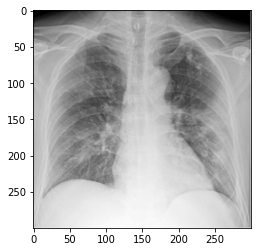

out of 8 models:
7 models predicted covid-19
0 models predicted normal
1 models predicted pneumonia


In [16]:
import os
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
trained_models=[]
for r,d,f in os.walk('drive/My Drive/Covid_Detection/best_models/'):
  print(r)
  for file in f:
    trained_models.append(os.path.join(r,file))

print(trained_models)
covid_count=0
normal_count=0
pneumonia_count=0
img=cv2.resize(cv2.imread('drive/My Drive/Covid_Detection/kjr-21-e24-g002-l-a.jpg'),(300,300)) #resize image
img=img.astype('float32') / 255.0 #scale the image
imgplot = plt.imshow(img)
plt.show()
for i in trained_models:
 net=keras.models.load_model(i) 
 
 pred_label=np.argmax(net.predict(np.expand_dims(img,axis=0))[0])
 if pred_label==0:
   covid_count+=1
 if pred_label==1:
    normal_count+=1
 if pred_label==2:
     pneumonia_count+=1
 
print("out of 8 models:")
print(covid_count,"models predicted covid-19")
print(normal_count,"models predicted normal")
print(pneumonia_count,"models predicted pneumonia")